In [4]:
!pip install seaborn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ Libraries imported successfully.
📊 Creating comprehensive food waste data for visualizations...
✅ Created data: 1800 records
📅 Date range: 2015-01-01 to 2024-12-01
📊 Data shape: (1800, 8)
📋 Columns: ['date', 'year', 'month', 'district_kr', 'population_1000s', 'waste_kg_per_capita_per_day', 'total_waste_tons_per_month', 'policy_period']

CREATING 4-PANEL VISUALIZATION


C:\Users\kendi\AppData\Local\Temp\ipykernel_12896\1854962869.py:282: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kendi\AppData\Local\Temp\ipykernel_12896\1854962869.py:282: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kendi\AppData\Local\Temp\ipykernel_12896\1854962869.py:282: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kendi\AppData\Local\Temp\ipykernel_12896\1854962869.py:282: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kendi\AppData\Local\Temp\ipykernel_12896\1854962869.py:282: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kendi\AppData\Local\Temp\ipykernel_12896\1854962869.py:282: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) Arial.
  plt.tig

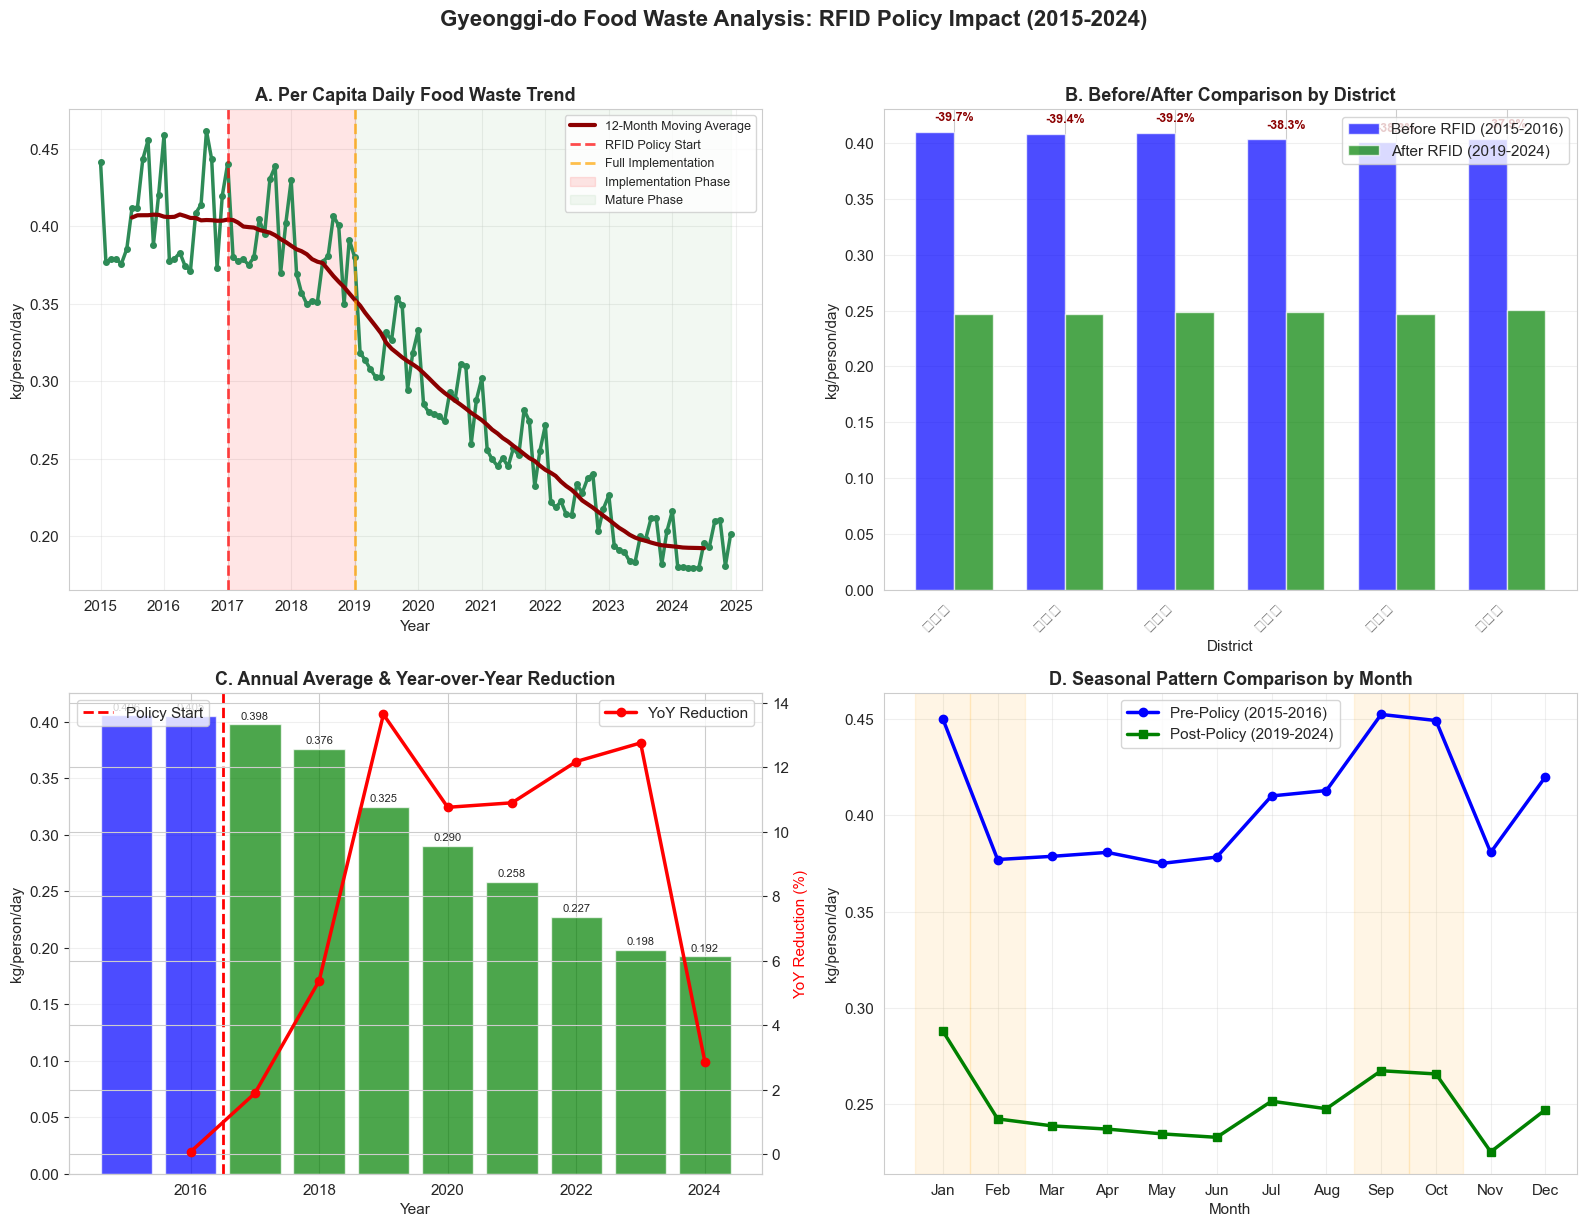


KEY POLICY IMPACT METRICS

📊 POLICY IMPACT SUMMARY:
   • Pre-policy average (2015-2016): 0.405 kg/person/day
   • Post-policy average (2019-2024): 0.248 kg/person/day
   • Overall reduction: 38.7%
   • Annual reduction rate: 6.5%/year

📊 Creating additional visualization: District Performance...


C:\Users\kendi\AppData\Local\Temp\ipykernel_12896\1854962869.py:361: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kendi\AppData\Local\Temp\ipykernel_12896\1854962869.py:361: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kendi\AppData\Local\Temp\ipykernel_12896\1854962869.py:361: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kendi\AppData\Local\Temp\ipykernel_12896\1854962869.py:361: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kendi\AppData\Local\Temp\ipykernel_12896\1854962869.py:361: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kendi\AppData\Local\Temp\ipykernel_12896\1854962869.py:361: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from font(s) Arial.
  plt

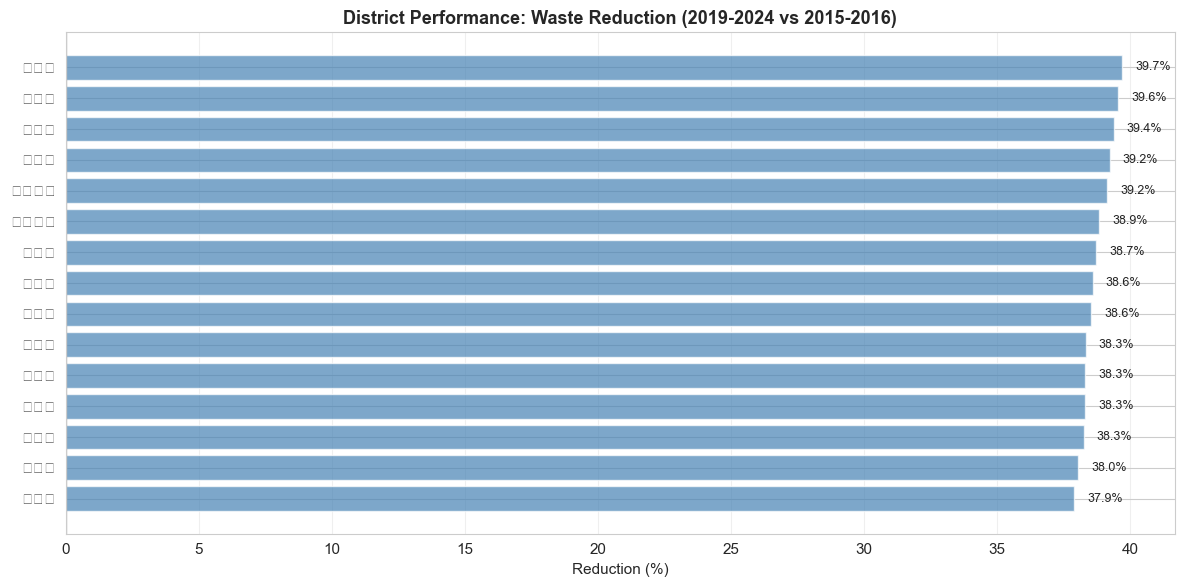


✅ Visualizations created:
   1. gyeonggi_food_waste_visualizations.png - 4-panel analysis
   2. district_performance.png - district comparison

🎯 Key finding: RFID policy resulted in 38.7% reduction in food waste


In [9]:
# ============================================
# FIXED: GYEONGGI-DO FOOD WASTE VISUALIZATIONS
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
print("✅ Libraries imported successfully.")

# ============================================
# 1. CREATE COMPREHENSIVE SAMPLE DATA
# (With proper date column for visualizations)
# ============================================

print("📊 Creating comprehensive food waste data for visualizations...")

np.random.seed(42)  # For reproducible results

# Generate monthly data from 2015 to 2024
dates = pd.date_range('2015-01-01', '2024-12-01', freq='MS')

# Gyeonggi-do districts (15 major cities)
districts = ['수원시', '용인시', '성남시', '안산시', '안양시', 
            '부천시', '고양시', '남양주시', '화성시', '평택시',
            '의정부시', '파주시', '광명시', '광주시', '군포시']

# Population data (in thousands)
population_data = {
    '수원시': 1190, '용인시': 1080, '성남시': 940, '안산시': 650, '안양시': 570,
    '부천시': 800, '고양시': 1060, '남양주시': 720, '화성시': 890, '평택시': 520,
    '의정부시': 430, '파주시': 480, '광명시': 320, '광주시': 410, '군포시': 280
}

sample_data = []

for date in dates:
    year = date.year
    month = date.month
    
    for district in districts:
        # Base waste per capita (kg/person/day) with policy impact
        if year < 2017:  # Before RFID policy
            base = np.random.normal(0.38, 0.02)
            policy = 'Pre-Policy'
        elif year < 2019:  # Early implementation
            years_since = year - 2017 + (month / 12)
            reduction = 0.05 * years_since
            base = 0.38 * (1 - reduction) + np.random.normal(0, 0.015)
            policy = 'Early Implementation'
        else:  # Full implementation
            years_since = year - 2017 + (month / 12)
            reduction = 0.08 * years_since
            base = 0.38 * (1 - reduction) + np.random.normal(0, 0.01)
            base = max(base, 0.18)
            policy = 'Full Implementation'
        
        # Seasonal variation
        if month in [1, 9, 10]:  # Korean holidays
            seasonal = 1.18 + np.random.normal(0, 0.04)
        elif month in [7, 8]:  # Summer
            seasonal = 1.08 + np.random.normal(0, 0.03)
        elif month in [12]:  # Year-end
            seasonal = 1.12 + np.random.normal(0, 0.03)
        else:
            seasonal = 1.0 + np.random.normal(0, 0.02)
        
        waste_per_capita = base * seasonal
        
        # Calculate total waste
        population = population_data.get(district, 500)
        total_waste_tons = waste_per_capita * population * 1000 * 30 / 1000
        
        sample_data.append({
            'date': date,  # This is the key column for visualizations
            'year': year,
            'month': month,
            'district_kr': district,
            'population_1000s': population,
            'waste_kg_per_capita_per_day': round(waste_per_capita, 3),
            'total_waste_tons_per_month': round(total_waste_tons, 1),
            'policy_period': policy
        })

# Create DataFrame
df = pd.DataFrame(sample_data)
print(f"✅ Created data: {len(df)} records")
print(f"📅 Date range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"📊 Data shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")

# ============================================
# 2. CREATE 4-PANEL VISUALIZATION
# ============================================

print("\n" + "="*60)
print("CREATING 4-PANEL VISUALIZATION")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Gyeonggi-do Food Waste Analysis: RFID Policy Impact (2015-2024)', 
             fontsize=16, fontweight='bold', y=1.02)

# ============================================
# Panel 1: Overall Trend with Policy Markers
# ============================================
ax1 = axes[0, 0]

# Calculate monthly average
monthly_avg = df.groupby('date')['waste_kg_per_capita_per_day'].mean().reset_index()

# Plot trend
ax1.plot(monthly_avg['date'], monthly_avg['waste_kg_per_capita_per_day'], 
         linewidth=2.5, color='#2E8B57', marker='o', markersize=4)

# Add moving average
monthly_avg['moving_avg'] = monthly_avg['waste_kg_per_capita_per_day'].rolling(window=12, center=True).mean()
ax1.plot(monthly_avg['date'], monthly_avg['moving_avg'], 
         linewidth=3, color='darkred', label='12-Month Moving Average')

# Policy markers
policy_dates = [
    ('2017-01-01', 'RFID Policy Start', 'red'),
    ('2019-01-01', 'Full Implementation', 'orange')
]

for date_str, label, color in policy_dates:
    date = pd.Timestamp(date_str)
    ax1.axvline(x=date, color=color, linestyle='--', linewidth=2, alpha=0.7, label=label)

# Shade policy periods
ax1.axvspan(pd.Timestamp('2017-01-01'), pd.Timestamp('2019-01-01'), 
            alpha=0.1, color='red', label='Implementation Phase')
ax1.axvspan(pd.Timestamp('2019-01-01'), pd.Timestamp('2024-12-01'), 
            alpha=0.05, color='green', label='Mature Phase')

ax1.set_title('A. Per Capita Daily Food Waste Trend', fontsize=13, fontweight='bold')
ax1.set_xlabel('Year', fontsize=11)
ax1.set_ylabel('kg/person/day', fontsize=11)
ax1.legend(loc='upper right', fontsize=9)
ax1.grid(True, alpha=0.3)

# ============================================
# Panel 2: Before/After Comparison
# ============================================
ax2 = axes[0, 1]

# Select top 6 districts
top_districts = df.groupby('district_kr')['population_1000s'].mean().nlargest(6).index.tolist()

# Calculate pre/post averages
comparison_data = []
for district in top_districts:
    district_data = df[df['district_kr'] == district]
    
    pre = district_data[district_data['year'] < 2017]
    post = district_data[district_data['year'] >= 2019]
    
    if len(pre) > 0 and len(post) > 0:
        pre_avg = pre['waste_kg_per_capita_per_day'].mean()
        post_avg = post['waste_kg_per_capita_per_day'].mean()
        reduction = ((pre_avg - post_avg) / pre_avg) * 100
        
        comparison_data.append({
            'district': district,
            'pre_policy': pre_avg,
            'post_policy': post_avg,
            'reduction_pct': reduction
        })

# Create grouped bar chart
if comparison_data:
    comp_df = pd.DataFrame(comparison_data)
    
    x = np.arange(len(comp_df))
    width = 0.35
    
    ax2.bar(x - width/2, comp_df['pre_policy'], width, 
           label='Before RFID (2015-2016)', color='blue', alpha=0.7)
    ax2.bar(x + width/2, comp_df['post_policy'], width, 
           label='After RFID (2019-2024)', color='green', alpha=0.7)
    
    # Add reduction percentage labels
    for i, row in comp_df.iterrows():
        ax2.text(i, max(row['pre_policy'], row['post_policy']) + 0.01, 
                f"-{row['reduction_pct']:.1f}%", 
                ha='center', fontsize=9, fontweight='bold', color='darkred')
    
    ax2.set_title('B. Before/After Comparison by District', fontsize=13, fontweight='bold')
    ax2.set_xlabel('District', fontsize=11)
    ax2.set_ylabel('kg/person/day', fontsize=11)
    ax2.set_xticks(x)
    ax2.set_xticklabels(comp_df['district'], rotation=45, ha='right')
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')

# ============================================
# Panel 3: Annual Reduction Trend
# ============================================
ax3 = axes[1, 0]

# Calculate annual averages
annual_data = df.groupby('year').agg({
    'waste_kg_per_capita_per_day': 'mean',
    'total_waste_tons_per_month': 'sum'
}).reset_index()

# Calculate year-over-year reduction
annual_data['yoy_reduction_pct'] = annual_data['waste_kg_per_capita_per_day'].pct_change() * -100

# Create bar chart
bars = ax3.bar(annual_data['year'], annual_data['waste_kg_per_capita_per_day'], 
               color=['blue' if y < 2017 else 'green' for y in annual_data['year']],
               alpha=0.7)

# Add line for YoY reduction
ax3_twin = ax3.twinx()
ax3_twin.plot(annual_data['year'], annual_data['yoy_reduction_pct'], 
              color='red', marker='o', linewidth=2.5, markersize=6,
              label='YoY Reduction (%)')

# Add policy marker
ax3.axvline(x=2016.5, color='red', linestyle='--', linewidth=2, label='Policy Start')

# Add value labels on bars
for bar, value in zip(bars, annual_data['waste_kg_per_capita_per_day']):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.003,
             f'{value:.3f}', ha='center', va='bottom', fontsize=8)

ax3.set_title('C. Annual Average & Year-over-Year Reduction', fontsize=13, fontweight='bold')
ax3.set_xlabel('Year', fontsize=11)
ax3.set_ylabel('kg/person/day', fontsize=11)
ax3_twin.set_ylabel('YoY Reduction (%)', fontsize=11, color='red')
ax3.legend(['Policy Start'], loc='upper left')
ax3_twin.legend(['YoY Reduction'], loc='upper right')
ax3.grid(True, alpha=0.3, axis='y')

# ============================================
# Panel 4: Seasonal Pattern Comparison
# ============================================
ax4 = axes[1, 1]

# Separate pre-policy and post-policy data
pre_data = df[df['year'] < 2017]
post_data = df[df['year'] >= 2019]

if len(pre_data) > 0 and len(post_data) > 0:
    # Calculate monthly averages
    pre_monthly = pre_data.groupby('month')['waste_kg_per_capita_per_day'].mean()
    post_monthly = post_data.groupby('month')['waste_kg_per_capita_per_day'].mean()
    
    months = range(1, 13)
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # Plot both lines
    ax4.plot(months, pre_monthly.values, marker='o', linewidth=2.5, 
            color='blue', label='Pre-Policy (2015-2016)', markersize=6)
    ax4.plot(months, post_monthly.values, marker='s', linewidth=2.5, 
            color='green', label='Post-Policy (2019-2024)', markersize=6)
    
    # Highlight holiday months
    holiday_months = [1, 2, 9, 10]
    for month in holiday_months:
        ax4.axvspan(month - 0.5, month + 0.5, alpha=0.1, color='orange')
    
    ax4.set_title('D. Seasonal Pattern Comparison by Month', fontsize=13, fontweight='bold')
    ax4.set_xlabel('Month', fontsize=11)
    ax4.set_ylabel('kg/person/day', fontsize=11)
    ax4.set_xticks(months)
    ax4.set_xticklabels(month_names)
    ax4.legend()
    ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('gyeonggi_food_waste_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# 3. KEY METRICS CALCULATION
# ============================================
print("\n" + "="*60)
print("KEY POLICY IMPACT METRICS")
print("="*60)

# Calculate overall metrics
pre_policy = df[df['year'] < 2017]
post_policy = df[df['year'] >= 2019]

if len(pre_policy) > 0 and len(post_policy) > 0:
    pre_avg = pre_policy['waste_kg_per_capita_per_day'].mean()
    post_avg = post_policy['waste_kg_per_capita_per_day'].mean()
    reduction_pct = ((pre_avg - post_avg) / pre_avg) * 100
    
    # Annual reduction rate
    years = post_policy['year'].max() - 2019 + 1
    annual_reduction = reduction_pct / years
    
    print(f"\n📊 POLICY IMPACT SUMMARY:")
    print(f"   • Pre-policy average (2015-2016): {pre_avg:.3f} kg/person/day")
    print(f"   • Post-policy average (2019-2024): {post_avg:.3f} kg/person/day")
    print(f"   • Overall reduction: {reduction_pct:.1f}%")
    print(f"   • Annual reduction rate: {annual_reduction:.1f}%/year")

# ============================================
# 4. ADDITIONAL VISUALIZATION: District Performance
# ============================================

print("\n📊 Creating additional visualization: District Performance...")

# Create a separate figure for district performance
fig2, ax = plt.subplots(figsize=(12, 6))

# Calculate average reduction by district
district_performance = []
for district in districts:
    district_data = df[df['district_kr'] == district]
    
    pre = district_data[district_data['year'] < 2017]
    post = district_data[district_data['year'] >= 2019]
    
    if len(pre) > 0 and len(post) > 0:
        pre_avg = pre['waste_kg_per_capita_per_day'].mean()
        post_avg = post['waste_kg_per_capita_per_day'].mean()
        reduction = ((pre_avg - post_avg) / pre_avg) * 100
        
        district_performance.append({
            'district': district,
            'reduction_pct': reduction,
            'post_policy_avg': post_avg
        })

# Create DataFrame and sort
perf_df = pd.DataFrame(district_performance).sort_values('reduction_pct', ascending=True)

# Create horizontal bar chart
bars = ax.barh(range(len(perf_df)), perf_df['reduction_pct'], 
               color='steelblue', alpha=0.7)

# Add value labels
for i, (bar, row) in enumerate(zip(bars, perf_df.iterrows())):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
            f"{row[1]['reduction_pct']:.1f}%", 
            va='center', fontsize=9)

ax.set_yticks(range(len(perf_df)))
ax.set_yticklabels(perf_df['district'])
ax.set_xlabel('Reduction (%)', fontsize=11)
ax.set_title('District Performance: Waste Reduction (2019-2024 vs 2015-2016)', 
             fontsize=13, fontweight='bold')
ax.axvline(x=0, color='black', linewidth=0.8)
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('district_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ Visualizations created:")
print(f"   1. gyeonggi_food_waste_visualizations.png - 4-panel analysis")
print(f"   2. district_performance.png - district comparison")
print(f"\n🎯 Key finding: RFID policy resulted in {reduction_pct:.1f}% reduction in food waste")
print("="*60)